In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Perunta 1

Quantos países ganharam alguma medalha?


In [6]:
df_medals = pd.read_csv('../data/medals_total.csv', sep=',', encoding='utf-8')
df_medals.head()

,country_code,country,country_long,Gold Medal,Silver Medal,Bronze Medal,Total
0,USA,United States,United States of America,40,44,42,126
1,CHN,China,People's Republic of China,40,27,24,91
2,JPN,Japan,Japan,20,12,13,45
3,AUS,Australia,Australia,18,19,16,53
4,FRA,France,France,16,26,22,64


In [7]:
df_medals.tail()

,country_code,country,country_long,Gold Medal,Silver Medal,Bronze Medal,Total
87,PER,Peru,Peru,0,0,1,1
88,QAT,Qatar,Qatar,0,0,1,1
89,SGP,Singapore,Singapore,0,0,1,1
90,SVK,Slovakia,Slovakia,0,0,1,1
91,ZAM,Zambia,Zambia,0,0,1,1


In [9]:
total_paises_com_medalha = df_medals['country_code'].nunique()
print(f"Total de países que ganharam medalhas: {total_paises_com_medalha}")


Total de países que ganharam medalhas: 92


Pergunta 2

Quantas medalhas foram distribuídas nas Olimpíadas de Paris?

In [10]:
# Somando o total de medalhas
total_medalhas_distribuidas = df_medals['Total'].sum()

print(f"Total de medalhas distribuídas: {total_medalhas_distribuidas}")


Total de medalhas distribuídas: 1043


Pergunta 3

Qual a altura média, respectivamente, dos atletas homens e mulheres?


In [13]:
df_athletes = pd.read_csv('../data/athletes.csv', sep=',', encoding='utf-8')
df_athletes.head()

,code,name,name_short,name_tv,gender,function,country_code,country,country_long,nationality,...,family,lang,coach,reason,hero,influence,philosophy,sporting_relatives,ritual,other_sports
0,1532872,ALEKSANYAN Artur,ALEKSANYAN A,Artur ALEKSANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,"Father, Gevorg Aleksanyan","Armenian, English, Russian","Gevorg Aleksanyan (ARM), father",He followed his father and his uncle into the ...,"Footballer Zinedine Zidane (FRA), World Cup wi...","His father, Gevorg Aleksanyan","""Wrestling is my life."" (mediamax.am. 18 May 2...",NaN,NaN,NaN
1,1532873,AMOYAN Malkhas,AMOYAN M,Malkhas AMOYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,NaN,Armenian,NaN,NaN,NaN,NaN,"""To become a good athlete, you first have to b...","Uncle, Roman Amoyan (wrestling), 2008 Olympic ...",NaN,NaN
2,1532874,GALSTYAN Slavik,GALSTYAN S,Slavik GALSTYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,NaN,Armenian,Personal: Martin Alekhanyan (ARM).<br>National...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1532944,HARUTYUNYAN Arsen,HARUTYUNYAN A,Arsen HARUTYUNYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,"Wife, Diana (married October 2022). Daughter, ...",Armenian,National: Habetnak Kurghinyan,While doing karate he noticed wrestlers traini...,"Wrestler Armen Nazaryan (ARM, BUL), two-time O...",NaN,"“Nothing is impossible, set goals in front of ...",NaN,NaN,NaN
4,1532945,TEVANYAN Vazgen,TEVANYAN V,Vazgen TEVANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,"Wife, Sona (married November 2023)","Armenian, Russian",National: Habetnak Kurghinyan (ARM),“My family did not like wrestling very much. A...,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11110 entries, 0 to 11109
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   code                11110 non-null  int64  
 1   name                11110 non-null  object 
 2   name_short          11110 non-null  object 
 3   name_tv             11110 non-null  object 
 4   gender              11110 non-null  object 
 5   function            11110 non-null  object 
 6   country_code        11110 non-null  object 
 7   country             11110 non-null  object 
 8   country_long        11110 non-null  object 
 9   nationality         11107 non-null  object 
 10  nationality_full    11107 non-null  object 
 11  nationality_code    11107 non-null  object 
 12  height              11110 non-null  int64  
 13  weight              11108 non-null  float64
 14  disciplines         11110 non-null  object 
 15  events              11110 non-null  object 
 16  birt

In [19]:
import pandas as pd

# Criando um dataframe apenas com as colunas relevantes
df_genero_altura = df_athletes[['gender', 'height']].dropna()

# Exibir os primeiros registros para ver se os valores fazem sentido
df_genero_altura.head(15)

,gender,height
0,Male,0
1,Male,0
2,Male,0
3,Male,0
4,Male,0
5,Female,162
6,Male,0
7,Female,161
8,Male,178
9,Female,0


In [20]:
# Removendo registros onde a altura é zero
df_filtrado = df_genero_altura[df_genero_altura['height'] > 0]

# Agora, calculando a média de altura por gênero
media_altura_por_genero = df_filtrado.groupby('gender')['height'].mean()

print(media_altura_por_genero)

gender
Female    172.224828
Male      185.363916
Name: height, dtype: float64


Pergunta 4

Na tabela de atletas, qual desses campos não tem valores faltantes?


In [21]:
# Escolhendo as colunas que deseja verificar
colunas_verificar = ['gender', 'nickname', 'residence_country', 'birth_country']

# Contando valores nulos em cada coluna
valores_faltantes = df_athletes[colunas_verificar].isnull().sum()

print(valores_faltantes)

gender                  0
nickname             8144
residence_country    2822
birth_country        1635
dtype: int64


Pergunta 5

Em qual dia das Olimpíadas foram distribuídas mais medalhas?


In [24]:
df_medals = pd.read_csv('../data/medals.csv', sep=',', encoding='utf-8')
df_medals.head()

,medal_type,medal_code,medal_date,name,gender,discipline,event,event_type,url_event,code,country_code,country,country_long
0,Gold Medal,1.0,2024-07-27,Remco EVENEPOEL,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1903136,BEL,Belgium,Belgium
1,Silver Medal,2.0,2024-07-27,Filippo GANNA,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1923520,ITA,Italy,Italy
2,Bronze Medal,3.0,2024-07-27,Wout van AERT,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1903147,BEL,Belgium,Belgium
3,Gold Medal,1.0,2024-07-27,Grace BROWN,W,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1940173,AUS,Australia,Australia
4,Silver Medal,2.0,2024-07-27,Anna HENDERSON,W,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1912525,GBR,Great Britain,Great Britain


In [25]:
# Contar quantas medalhas foram entregues em cada dia
dias_com_mais_medalhas = df_medals['medal_date'].value_counts()

# Exibir o dia com mais entregas
dia_top = dias_com_mais_medalhas.idxmax()
quantidade_top = dias_com_mais_medalhas.max()

print(f"O dia com mais entregas de medalhas foi {dia_top}, com {quantidade_top} medalhas.")

O dia com mais entregas de medalhas foi 2024-08-10, com 117 medalhas.


Pergunta 6

Qual esporte distribuiu mais medalhas?


In [26]:
# Contar quantas medalhas foram entregues por disciplina/esporte
esportes_com_mais_medalhas = df_medals['discipline'].value_counts()

# Identificar o esporte com mais medalhas distribuídas
esporte_top = esportes_com_mais_medalhas.idxmax()
quantidade_top = esportes_com_mais_medalhas.max()

print(f"O esporte que distribuiu mais medalhas foi {esporte_top}, com {quantidade_top} medalhas.")

O esporte que distribuiu mais medalhas foi Athletics, com 145 medalhas.


In [28]:
esportes_com_mais_medalhas.head(10).reset_index()  # Mostra os 10 esportes com mais medalhas distribuídas

,discipline,count
0,Athletics,145
1,Swimming,105
2,Wrestling,72
3,Judo,60
4,Boxing,52
5,Shooting,45
6,Artistic Gymnastics,43
7,Rowing,42
8,Fencing,36
9,Cycling Track,36


Pergunta 7

Qual destas afirmações é verdadeira?


- Yufei Zhang é a atleta que mais ganhou medalhas nos Jogos.  V

- O número de homens que participaram dos Jogos é levemente inferior ao de mulheres.

- O número de medalhas de bronze, prata e ouro é idêntico.

- Pelo menos metade dos países participantes ganhou alguma medalha.

In [32]:
df_medallists = pd.read_csv('../data/medallists.csv', sep=',', encoding='utf-8')
df_medallists.head()

,medal_date,medal_type,medal_code,name,gender,country_code,country,country_long,nationality,team,team_gender,discipline,event,event_type,url_event,birth_date,code_athlete,code_team
0,2024-07-27,Gold Medal,1.0,EVENEPOEL Remco,Male,BEL,Belgium,Belgium,Belgium,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,2000-01-25,1903136,NaN
1,2024-07-27,Silver Medal,2.0,GANNA Filippo,Male,ITA,Italy,Italy,Italy,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1996-07-25,1923520,NaN
2,2024-07-27,Bronze Medal,3.0,van AERT Wout,Male,BEL,Belgium,Belgium,Belgium,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1994-09-15,1903147,NaN
3,2024-07-27,Gold Medal,1.0,BROWN Grace,Female,AUS,Australia,Australia,Australia,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1992-07-07,1940173,NaN
4,2024-07-27,Silver Medal,2.0,HENDERSON Anna,Female,GBR,Great Britain,Great Britain,Great Britain,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1998-11-14,1912525,NaN


In [33]:
# Contar quantas medalhas cada atleta ganhou
atletas_com_mais_medalhas = df_medallists['name'].value_counts()

# Identificar o atleta com mais medalhas
atleta_top = atletas_com_mais_medalhas.idxmax()
quantidade_top = atletas_com_mais_medalhas.max()

print(f"O atleta que ganhou mais medalhas foi {atleta_top}, com {quantidade_top} medalhas.")

O atleta que ganhou mais medalhas foi ZHANG Yufei, com 6 medalhas.


In [34]:
atletas_com_mais_medalhas.head(10).reset_index() # Mostra os 10 atletas com mais medalhas

,name,count
0,ZHANG Yufei,6
1,O'CALLAGHAN Mollie,5
2,MARCHAND Leon,5
3,SMITH Regan,5
4,McKEOWN Kaylee,5
5,HUSKE Torri,5
6,LEDECKY Katie,4
7,McINTOSH Summer,4
8,TITMUS Ariarne,4
9,OKA Shinnosuke,4


Pergunta 8

Entre os países que ganharam pelo menos 10 medalhas, qual país tem a maior taxa de medalhas per capita?

dica: Crie uma coluna nova, no dado integrado, que você pode chamar de populacao_por_medalha.



In [36]:
df_medals = pd.read_csv('../data/medals_total.csv', sep=',', encoding='utf-8')
df_medals.head()

,country_code,country,country_long,Gold Medal,Silver Medal,Bronze Medal,Total
0,USA,United States,United States of America,40,44,42,126
1,CHN,China,People's Republic of China,40,27,24,91
2,JPN,Japan,Japan,20,12,13,45
3,AUS,Australia,Australia,18,19,16,53
4,FRA,France,France,16,26,22,64


In [40]:
# Criando um novo dataframe apenas com as colunas desejadas
df_total_medals = df_medals[['country_code', 'country', 'country_long', 'Total']]


# Filtrando apenas países com 10 ou mais medalhas
df_filtrado = df_total_medals[df_total_medals['Total'] >= 10]

# Exibindo as primeiras linhas para conferir os dados
df_filtrado


,country_code,country,country_long,Total
0,USA,United States,United States of America,126
1,CHN,China,People's Republic of China,91
2,JPN,Japan,Japan,45
3,AUS,Australia,Australia,53
4,FRA,France,France,64
5,NED,Netherlands,Netherlands,34
6,GBR,Great Britain,Great Britain,65
7,KOR,Korea,Republic of Korea,32
8,ITA,Italy,Italy,40
9,GER,Germany,Germany,33


In [58]:
df_populacao_pais = pd.read_csv('../data/populacao_por_pais.csv', sep=',', encoding='utf-8')

# Selecionando apenas as colunas desejadas
df_populacao_pais = df_populacao_pais[['Country Name', 'Country Code', '2023']]

# Exibindo as primeiras linhas para conferir os dados
df_populacao_pais.head(10)

,Country Name,Country Code,2023
0,Aruba,ABW,106277.0
1,Africa Eastern and Southern,AFE,739108306.0
2,Afghanistan,AFG,42239854.0
3,Africa Western and Central,AFW,502789511.0
4,Angola,AGO,36684202.0
5,Albania,ALB,2745972.0
6,Andorra,AND,80088.0
7,Arab World,ARB,473272080.0
8,United Arab Emirates,ARE,9516871.0
9,Argentina,ARG,46654581.0


In [48]:

# Renomeando a coluna 'Country Code' para corresponder ao 'country_code' do df_filtrado
df_populacao_pais = df_populacao_pais.rename(columns={'Country Code': 'country_code', '2023': 'populacao_2023'})

# Fazendo o merge dos dataframes usando 'country_code' como chave
df_final = df_filtrado.merge(df_populacao_pais[['country_code', 'populacao_2023']], on='country_code', how='left')

# Removendo linhas onde a coluna 'populacao_2023' tem valores NaN
df_final = df_final.dropna(subset=['populacao_2023'])

# Convertendo a coluna para inteiro
df_final['populacao_2023'] = df_final['populacao_2023'].astype(int)



# Exibir as primeiras linhas para verificar os dados
df_final

,country_code,country,country_long,Total,populacao_2023
0,USA,United States,United States of America,126,334914895
1,CHN,China,People's Republic of China,91,1410710000
2,JPN,Japan,Japan,45,124516650
3,AUS,Australia,Australia,53,26638544
4,FRA,France,France,64,68170228
6,GBR,Great Britain,Great Britain,65,68350000
7,KOR,Korea,Republic of Korea,32,51712619
8,ITA,Italy,Italy,40,58761146
10,NZL,New Zealand,New Zealand,20,5223100
11,CAN,Canada,Canada,27,40097761


In [55]:
# Criando a coluna de medalhas per capita
df_final['medals_per_capita'] = df_final['medals_per_capita'].apply(lambda x: f"{x:.10f}")

# Exibindo as primeiras linhas para conferir
df_final

,country_code,country,country_long,Total,populacao_2023,medals_per_capita
0,USA,United States,United States of America,126,334914895,0.0000003762
1,CHN,China,People's Republic of China,91,1410710000,0.0000000645
2,JPN,Japan,Japan,45,124516650,0.0000003614
3,AUS,Australia,Australia,53,26638544,0.0000019896
4,FRA,France,France,64,68170228,0.0000009388
6,GBR,Great Britain,Great Britain,65,68350000,0.0000009510
7,KOR,Korea,Republic of Korea,32,51712619,0.0000006188
8,ITA,Italy,Italy,40,58761146,0.0000006807
10,NZL,New Zealand,New Zealand,20,5223100,0.0000038291
11,CAN,Canada,Canada,27,40097761,0.0000006734


In [56]:
# Ordenando do maior para o menor
df_final = df_final.sort_values(by='medals_per_capita', ascending=False)

# Exibindo as primeiras linhas para conferir
df_final

,country_code,country,country_long,Total,populacao_2023,medals_per_capita
10,NZL,New Zealand,New Zealand,20,5223100,0.0000038291
3,AUS,Australia,Australia,53,26638544,0.0000019896
13,HUN,Hungary,Hungary,19,9589872,0.0000019813
15,SWE,Sweden,Sweden,11,10536632,0.0000010440
6,GBR,Great Britain,Great Britain,65,68350000,0.0000009510
4,FRA,France,France,64,68170228,0.0000009388
20,BEL,Belgium,Belgium,10,11822592,0.0000008458
8,ITA,Italy,Italy,40,58761146,0.0000006807
11,CAN,Canada,Canada,27,40097761,0.0000006734
7,KOR,Korea,Republic of Korea,32,51712619,0.0000006188


Pergunta 9

Qual país que menos ganha medalhas, levando-se em consideração o que seria esperado dado o tamanho da sua população?


In [60]:
lista_paises = ['BRA', 'PAK', 'IND', 'EGY' ]

# Filtrar apenas os países da lista
df_filtrado_paises = df_medals[df_medals['country_code'].isin(lista_paises)]

# Exibir as primeiras linhas para conferir
df_filtrado_paises.head()

,country_code,country,country_long,Gold Medal,Silver Medal,Bronze Medal,Total
19,BRA,Brazil,Brazil,3,7,10,20
53,EGY,Egypt,Egypt,1,1,1,3
63,PAK,Pakistan,Pakistan,1,0,0,1
71,IND,India,India,0,1,5,6


In [61]:

# Renomeando a coluna 'Country Code' para corresponder ao 'country_code' do df_filtrado
df_populacao_pais = df_populacao_pais.rename(columns={'Country Code': 'country_code', '2023': 'populacao_2023'})

# Fazendo o merge dos dataframes usando 'country_code' como chave
df_filtrado_paises_final = df_filtrado_paises.merge(df_populacao_pais[['country_code', 'populacao_2023']], on='country_code', how='left')

# Removendo linhas onde a coluna 'populacao_2023' tem valores NaN
df_filtrado_paises_final = df_filtrado_paises_final.dropna(subset=['populacao_2023'])

# Convertendo a coluna para inteiro
df_filtrado_paises_final['populacao_2023'] = df_filtrado_paises_final['populacao_2023'].astype(int)



# Exibir as primeiras linhas para verificar os dados
df_filtrado_paises_final

,country_code,country,country_long,Gold Medal,Silver Medal,Bronze Medal,Total,populacao_2023
0,BRA,Brazil,Brazil,3,7,10,20,216422446
1,EGY,Egypt,Egypt,1,1,1,3,112716598
2,PAK,Pakistan,Pakistan,1,0,0,1,240485658
3,IND,India,India,0,1,5,6,1428627663


In [72]:
# Garantindo que a coluna existe
df_filtrado_paises_final['medals_per_capita'] = df_filtrado_paises_final['Total'] / df_filtrado_paises_final['populacao_2023']

# Exibindo as primeiras linhas para conferir
df_filtrado_paises_final

,country_code,country,country_long,Gold Medal,Silver Medal,Bronze Medal,Total,populacao_2023,medals_per_capita
0,BRA,Brazil,Brazil,3,7,10,20,216422446,9.241186e-08
1,EGY,Egypt,Egypt,1,1,1,3,112716598,2.661542e-08
3,IND,India,India,0,1,5,6,1428627663,4.199835e-09
2,PAK,Pakistan,Pakistan,1,0,0,1,240485658,4.158252e-09


In [73]:
# Ordenando do maior para o menor ANTES da formatação
df_filtrado_paises_final = df_filtrado_paises_final.sort_values(by='medals_per_capita', ascending=False)

# Agora, formatando a coluna para exibição
df_filtrado_paises_final['medals_per_capita'] = df_filtrado_paises_final['medals_per_capita'].apply(lambda x: f"{x:.12f}")

# Exibindo as primeiras linhas para conferir
df_filtrado_paises_final

,country_code,country,country_long,Gold Medal,Silver Medal,Bronze Medal,Total,populacao_2023,medals_per_capita
0,BRA,Brazil,Brazil,3,7,10,20,216422446,0.000000092412
1,EGY,Egypt,Egypt,1,1,1,3,112716598,0.000000026615
3,IND,India,India,0,1,5,6,1428627663,0.000000004200
2,PAK,Pakistan,Pakistan,1,0,0,1,240485658,0.000000004158


Pergunta 10

Entre os fatores renda per capita, população e renda total (renda total da população), qual fator mais explica o número de medalhas alcançado por um país? 

dica: utilize a função corr() do Pandas.

In [76]:
df_renda= pd.read_csv('../data/renda_per_capita.csv', sep=',', encoding='utf-8')

# Selecionando apenas as colunas desejadas
df_renda = df_renda[['Country Name', 'Country Code', '2023']]


df_renda.head()

,Country Name,Country Code,2023
0,Aruba,ABW,NaN
1,Africa Eastern and Southern,AFE,1672.505957
2,Afghanistan,AFG,NaN
3,Africa Western and Central,AFW,1584.333285
4,Angola,AGO,2309.521620


In [77]:
df_medals.head()

,country_code,country,country_long,Gold Medal,Silver Medal,Bronze Medal,Total
0,USA,United States,United States of America,40,44,42,126
1,CHN,China,People's Republic of China,40,27,24,91
2,JPN,Japan,Japan,20,12,13,45
3,AUS,Australia,Australia,18,19,16,53
4,FRA,France,France,16,26,22,64


In [78]:
df_populacao_pais.head()

,Country Name,country_code,populacao_2023
0,Aruba,ABW,106277.0
1,Africa Eastern and Southern,AFE,739108306.0
2,Afghanistan,AFG,42239854.0
3,Africa Western and Central,AFW,502789511.0
4,Angola,AGO,36684202.0


In [82]:

# Renomeando a coluna 'Country Code' para corresponder ao 'country_code' do df_filtrado
df_populacao_pais = df_populacao_pais.rename(columns={'Country Code': 'country_code', '2023': 'populacao_2023'})


# Fazendo o merge dos dataframes usando 'country_code' como chave
df_medals_final = df_medals.merge(df_populacao_pais[['country_code', 'populacao_2023']], on='country_code', how='left')


# Removendo linhas onde a coluna 'populacao_2023' tem valores NaN
df_medals_final = df_medals_final.dropna(subset=['populacao_2023'])

# Convertendo a coluna para inteiro
df_medals_final['populacao_2023'] = df_medals_final['populacao_2023'].astype(int)



# Exibir as primeiras linhas para verificar os dados
df_medals_final

,country_code,country,country_long,Gold Medal,Silver Medal,Bronze Medal,Total,populacao_2023
0,USA,United States,United States of America,40,44,42,126,334914895
1,CHN,China,People's Republic of China,40,27,24,91,1410710000
2,JPN,Japan,Japan,20,12,13,45,124516650
3,AUS,Australia,Australia,18,19,16,53,26638544
4,FRA,France,France,16,26,22,64,68170228
...,...,...,...,...,...,...,...,...
85,CIV,Côte d'Ivoire,Côte d'Ivoire,0,0,1,1,28873034
87,PER,Peru,Peru,0,0,1,1,34352719
88,QAT,Qatar,Qatar,0,0,1,1,2716391
89,SGP,Singapore,Singapore,0,0,1,1,5917648


In [89]:
df_renda = df_renda.rename(columns={'Country Code': 'country_code', 'populacao_2023': 'renda_2023'})

df_renda


,Country Name,country_code,renda_2023
0,Aruba,ABW,NaN
1,Africa Eastern and Southern,AFE,1672.505957
2,Afghanistan,AFG,NaN
3,Africa Western and Central,AFW,1584.333285
4,Angola,AGO,2309.521620
...,...,...,...
261,Kosovo,XKX,5943.125714
262,"Yemen, Rep.",YEM,533.367123
263,South Africa,ZAF,6253.161613
264,Zambia,ZMB,1369.129365


In [93]:
# Fazendo o merge dos dataframes usando 'country_code' como chave
df_medals_final = df_medals_final.merge(df_renda[['country_code', 'renda_2023']], on='country_code', how='left')


# Removendo linhas onde a coluna 'populacao_2023' tem valores NaN
df_medals_final = df_medals_final.dropna(subset=['renda_2023'])

# Convertendo a coluna para inteiro
df_medals_final['renda_2023'] = df_medals_final['renda_2023'].astype(int)



# Exibir as primeiras linhas para verificar os dados
df_medals_final

,country_code,country,country_long,Gold Medal,Silver Medal,Bronze Medal,Total,populacao_2023,renda_2023
0,USA,United States,United States of America,40,44,42,126,334914895,81695
1,CHN,China,People's Republic of China,40,27,24,91,1410710000,12614
2,JPN,Japan,Japan,20,12,13,45,124516650,33834
3,AUS,Australia,Australia,18,19,16,53,26638544,64711
4,FRA,France,France,16,26,22,64,68170228,44460
...,...,...,...,...,...,...,...,...,...
60,CPV,Cabo Verde,Cabo Verde,0,0,1,1,598682,4321
61,CIV,Côte d'Ivoire,Côte d'Ivoire,0,0,1,1,28873034,2728
62,PER,Peru,Peru,0,0,1,1,34352719,7789
64,SGP,Singapore,Singapore,0,0,1,1,5917648,84734


In [132]:
# Removendo a coluna 'renda_total'
df_medals_final = df_medals_final.drop(columns=['renda_total'])

# Conferindo as primeiras linhas após a remoção
print(df_medals_final.head())

  country_code  Total  populacao_2023  renda_2023
0          USA    126       334914895       81695
1          CHN     91      1410710000       12614
2          JPN     45       124516650       33834
3          AUS     53        26638544       64711
4          FRA     64        68170228       44460


In [133]:
df_medals_final

,country_code,Total,populacao_2023,renda_2023
0,USA,126,334914895,81695
1,CHN,91,1410710000,12614
2,JPN,45,124516650,33834
3,AUS,53,26638544,64711
4,FRA,64,68170228,44460
...,...,...,...,...
60,CPV,1,598682,4321
61,CIV,1,28873034,2728
62,PER,1,34352719,7789
64,SGP,1,5917648,84734


In [130]:
pd.options.display.float_format = '{:.10f}'.format

# Exibir os primeiros valores para verificar
print(df_medals_final[['country_code', 'renda_2023', 'populacao_2023']].head())

  country_code  renda_2023  populacao_2023
0          USA       81695       334914895
1          CHN       12614      1410710000
2          JPN       33834       124516650
3          AUS       64711        26638544
4          FRA       44460        68170228


In [134]:
print(df_medals_final[['renda_2023', 'populacao_2023']].isnull().sum())
print(df_medals_final[df_medals_final['renda_2023'] < 0])  # Verifique valores negativos

renda_2023        0
populacao_2023    0
dtype: int64
Empty DataFrame
Columns: [country_code, Total, populacao_2023, renda_2023]
Index: []


In [135]:
df_medals_final['renda_2023'] = df_medals_final['renda_2023'].abs()

Pergunta 11

Gere um mapa de calor modalidade vs país. Você pode usar este código em Python:



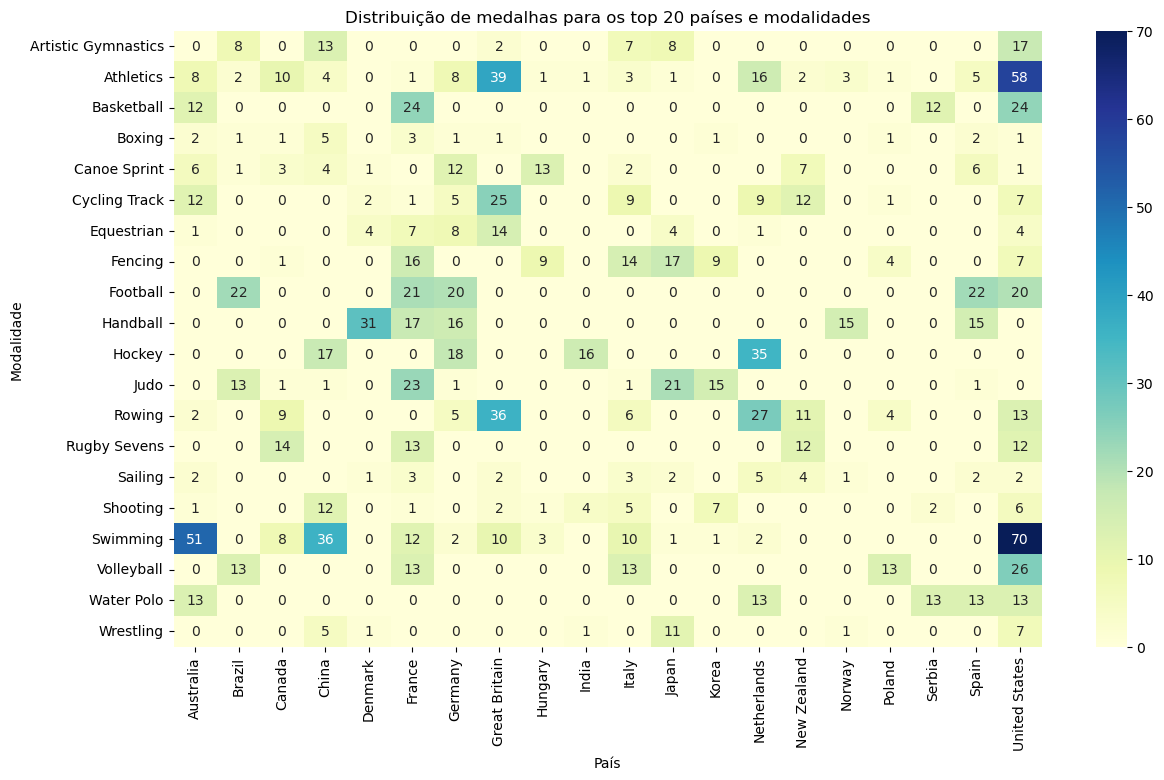

In [137]:
import seaborn as sns

top_countries = df_medallists['country'].value_counts().head(20).index

top_disciplines = df_medallists['discipline'].value_counts().head(20).index

filtered_data = df_medallists[(df_medallists['country'].isin(top_countries)) & (df_medallists['discipline'].isin(top_disciplines))] 
heatmap_data = filtered_data.pivot_table(index='discipline', columns='country', values='medal_code', aggfunc='count', fill_value=0)

 

plt.figure(figsize=(14, 8))

sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')

plt.title('Distribuição de medalhas para os top 20 países e modalidades')

plt.xlabel('País')


plt.ylabel('Modalidade')


plt.show()

Pergunta 12

Execute o código abaixo e responda qual a faixa de idade em que mais atletas ganharam medalhas.



C:\Users\MASTER\AppData\Local\Temp\ipykernel_15120\2734638864.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_medal_count = df_medallists.groupby(['country', 'age_group'])['medal_type'].count().unstack().fillna(0)


<Figure size 1400x1000 with 0 Axes>

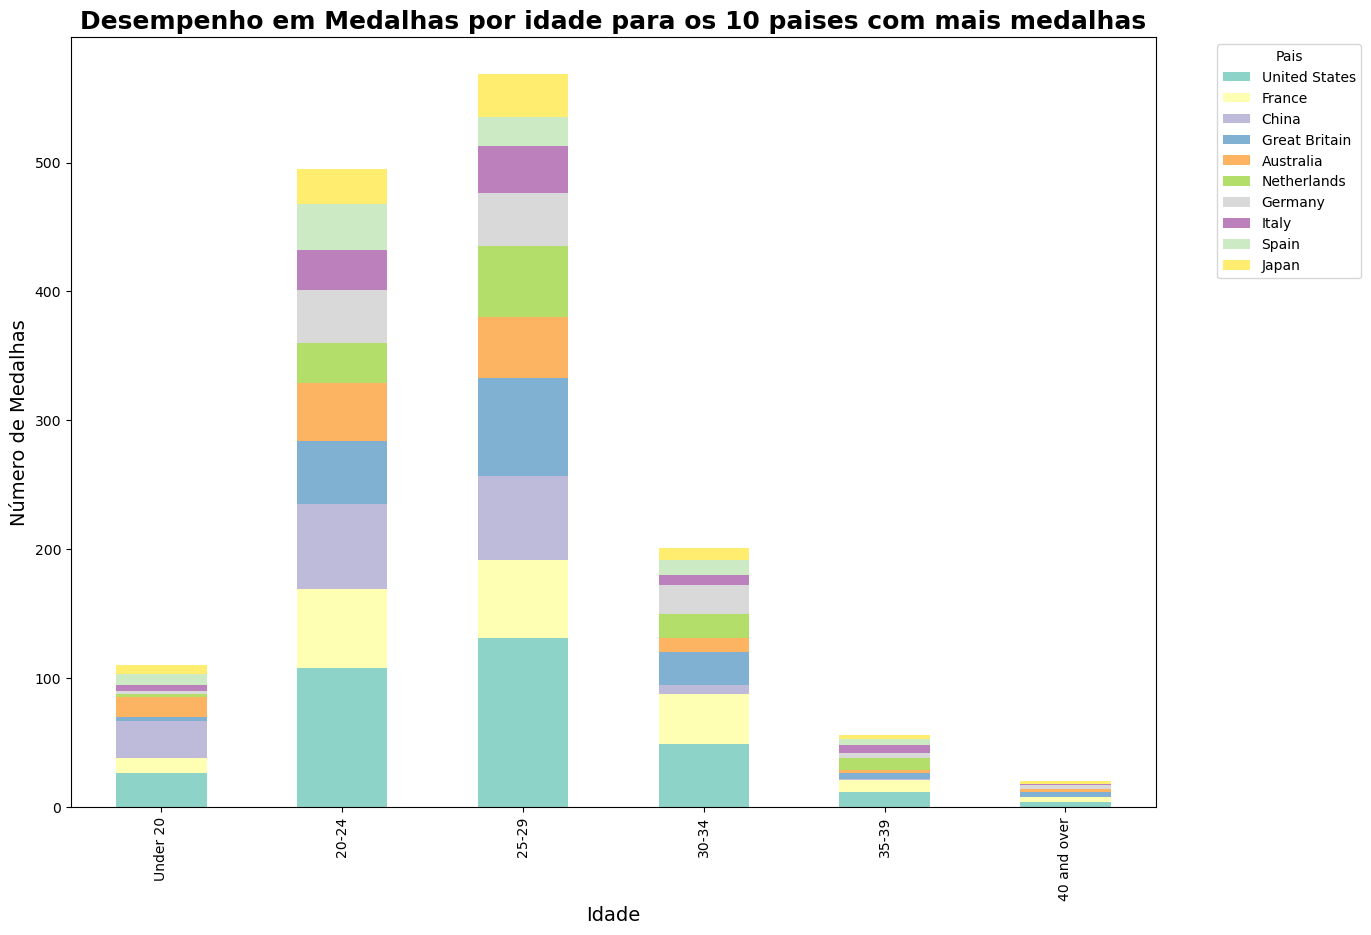

In [138]:
df_medallists['age'] = pd.to_datetime(df_medallists['medal_date']).dt.year - pd.to_datetime(df_medallists['birth_date']).dt.year

 

bins = [0, 20, 25, 30, 35, 40, 100]

labels = ['Under 20', '20-24', '25-29', '30-34', '35-39', '40 and over']

df_medallists['age_group'] = pd.cut(df_medallists['age'], bins=bins, labels=labels)

 

age_group_medal_count = df_medallists.groupby(['country', 'age_group'])['medal_type'].count().unstack().fillna(0)

 

top_10_countries_age = age_group_medal_count.sum(axis=1).sort_values(ascending=False).head(10)

age_group_medal_count = age_group_medal_count.loc[top_10_countries_age.index]

 

plt.figure(figsize=(14, 10))

age_group_medal_count.T.plot(kind='bar', stacked=True, figsize=(14, 10), cmap='Set3')

 

plt.xlabel('Idade', fontsize=14)

plt.ylabel('Número de Medalhas', fontsize=14)

plt.title('Desempenho em Medalhas por idade para os 10 paises com mais medalhas', fontsize=18, weight='bold')

plt.legend(title='Pais', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Pergunta 13

Qual modalidade tem, em média, os atletas mais velhos e mais jovens respectivamente? 

dica: este código converte a data de nascimento do atleta para um campo “age”:

medallists_df['age'] = 2024 - pd.to_datetime(medallists_df['birth_date']).dt.year

In [ ]:
df_medallists['age'] = 2024 - pd.to_datetime(df_medallists['birth_date']).dt.year

In [140]:
df_medallists.head()

,medal_date,medal_type,medal_code,name,gender,country_code,country,country_long,nationality,team,team_gender,discipline,event,event_type,url_event,birth_date,code_athlete,code_team,age,age_group
0,2024-07-27,Gold Medal,1.0000000000,EVENEPOEL Remco,Male,BEL,Belgium,Belgium,Belgium,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,2000-01-25,1903136,NaN,24.0000000000,20-24
1,2024-07-27,Silver Medal,2.0000000000,GANNA Filippo,Male,ITA,Italy,Italy,Italy,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1996-07-25,1923520,NaN,28.0000000000,25-29
2,2024-07-27,Bronze Medal,3.0000000000,van AERT Wout,Male,BEL,Belgium,Belgium,Belgium,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1994-09-15,1903147,NaN,30.0000000000,25-29
3,2024-07-27,Gold Medal,1.0000000000,BROWN Grace,Female,AUS,Australia,Australia,Australia,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1992-07-07,1940173,NaN,32.0000000000,30-34
4,2024-07-27,Silver Medal,2.0000000000,HENDERSON Anna,Female,GBR,Great Britain,Great Britain,Great Britain,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1998-11-14,1912525,NaN,26.0000000000,25-29


In [144]:
# Filtrar apenas os atletas de Shooting
shooting_data = df_medallists[df_medallists['discipline'] == 'Shooting']

# Calcular a média de idade
shooting_age_mean = shooting_data['age'].mean()

# Exibir resultado
print(f"A idade média dos atletas de Shooting é {shooting_age_mean:.2f} anos.")

A idade média dos atletas de Shooting é 27.00 anos.


In [149]:
print(df_medallists['age'].isnull().sum())  # Conta quantos valores nulos existem

0


In [150]:
print((df_medallists['age'] == 0).sum())  # Conta quantos valores são exatamente zero

0


In [151]:
df_medallists = df_medallists.dropna(subset=['age'])

In [152]:
# Calcular a média de idade por modalidade
age_by_discipline = df_medallists.groupby('discipline')['age'].mean()

# Ordenar do menor para o maior
age_by_discipline = age_by_discipline.sort_values()

# Encontrar a modalidade com a menor e maior idade média
lowest_age_discipline = age_by_discipline.idxmin()
highest_age_discipline = age_by_discipline.idxmax()

# Exibir os resultados
print(f"Modalidade com menor idade média: {lowest_age_discipline} ({age_by_discipline.min():.2f} anos)")
print(f"Modalidade com maior idade média: {highest_age_discipline} ({age_by_discipline.max():.2f} anos)")


Modalidade com menor idade média: Skateboarding (20.00 anos)
Modalidade com maior idade média: Equestrian (39.02 anos)


Pergunta 14

O que se pode afirmar sobre o perfil de idade dos medalhistas e dos participantes em geral?



In [155]:

df_athletes['age'] = 2024 - pd.to_datetime(df_athletes['birth_date']).dt.year

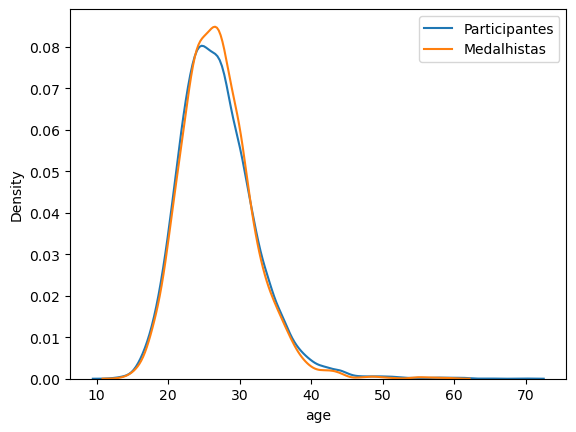

In [156]:
import seaborn as sns

sns.kdeplot(data=df_athletes, x='age', label='Participantes')

sns.kdeplot(data=df_medallists, x='age', label='Medalhistas')

plt.legend()

plt.show()

Pergunta 15

O Brasil ganhou uma medalha a cada


In [157]:
df_medals_final

,country_code,Total,populacao_2023,renda_2023
0,USA,126,334914895,81695
1,CHN,91,1410710000,12614
2,JPN,45,124516650,33834
3,AUS,53,26638544,64711
4,FRA,64,68170228,44460
...,...,...,...,...
60,CPV,1,598682,4321
61,CIV,1,28873034,2728
62,PER,1,34352719,7789
64,SGP,1,5917648,84734


In [159]:
# Filtrar os dados do Brasil
brasil_data = df_medals_final[df_medals_final['country_code'] == 'BRA']

# Calcular quantos habitantes por medalha
brasil_data['habitantes_por_medalha'] = brasil_data['populacao_2023'] / brasil_data['Total']

# Exibir resultado
print(brasil_data[['country_code', 'Total', 'populacao_2023', 'habitantes_por_medalha']])

   country_code  Total  populacao_2023  habitantes_por_medalha
17          BRA     20       216422446     10821122.3000000007


C:\Users\MASTER\AppData\Local\Temp\ipykernel_15120\564756040.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brasil_data['habitantes_por_medalha'] = brasil_data['populacao_2023'] / brasil_data['Total']
